# CV for KNN

In this problem, we compare 5-fold cross validation error, training set error, and test set error.

In [1]:
%matplotlib inline

import numpy as np
import idx2numpy
import mnist
import matplotlib.pyplot as plt
from sklearn import neighbors, cross_validation

train_image_labels = idx2numpy.convert_from_file('train-labels-idx1-ubyte')
train_images = idx2numpy.convert_from_file('train-images-idx3-ubyte')
test_image_labels = idx2numpy.convert_from_file('t10k-labels-idx1-ubyte')
test_images = idx2numpy.convert_from_file('t10k-images-idx3-ubyte')

flattened_train_images = train_images.reshape((train_images.shape[0],
                                               train_images.shape[1]*train_images.shape[2]), 
                                              order='C')
flattened_test_images = test_images.reshape((test_images.shape[0], 
                                             test_images.shape[1]*test_images.shape[2]), 
                                            order='C')

We see how the error rates change as we vary $K$, the number of neighbors.

In [2]:
k_min = 1
k_max = 11
K = np.arange(k_min, k_max + 1, step=2)
k_fold = cross_validation.KFold(n=len(train_images)//2, # use half the data set for speed
                                n_folds=5, shuffle=True) 
training_set_error = np.empty(len(K), dtype=np.float64)
test_set_error = np.empty_like(training_set_error)
cv_error = np.empty_like(training_set_error)
for i in range(len(K)):
    nn_clf = neighbors.KNeighborsClassifier(n_neighbors=K[i], algorithm='brute')
    nn_clf.fit(flattened_train_images, train_image_labels)
    # test on first 1000 for speed reasons
    training_set_error[i] = 1 - nn_clf.score(flattened_train_images[:1000], train_image_labels[:1000])
    test_set_error[i] = 1 - nn_clf.score(flattened_test_images[:1000], test_image_labels[:1000])
    cv_errors = 1 - cross_validation.cross_val_score(estimator=nn_clf, cv=k_fold,
                                                     X=flattened_train_images, y=train_image_labels)
    cv_error[i] = np.mean(cv_errors)

Let's plot these error error rates now.

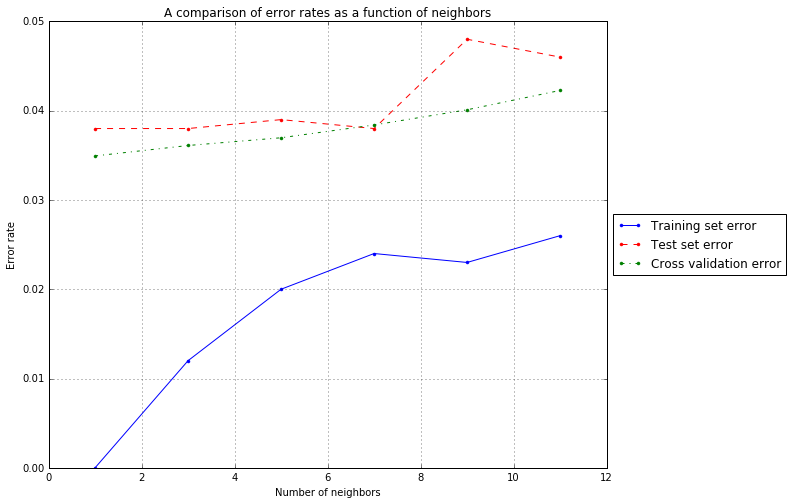

In [3]:
plt.figure(figsize=(10,8))
error_rate_lines = plt.plot(K, training_set_error, '-b.',
                            K, test_set_error, '--r.',
                            K, cv_error, '-.g.')
plt.legend(error_rate_lines, ('Training set error','Test set error','Cross validation error'),
           loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel("Number of neighbors")
plt.ylabel("Error rate")
plt.title('A comparison of error rates as a function of neighbors')
plt.grid()
plt.show()

As one would expect, the training set error is lowest. Cross validation error is similar to test set error, so it would generally serve as a good proxy when we cannot afford to throw away data. In this particular case, model complexity is a good thing, for as we use more neighbors, all error rates increase.